In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import customized_obj as cus_obj

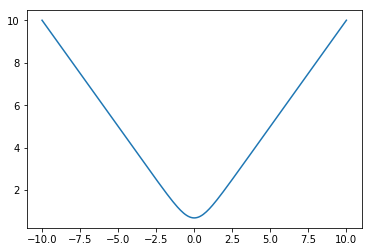

In [2]:
n=100
x = np.arange(-n,n+1)*0.1
y = np.log(np.exp(x)+np.exp(-x))
plt.plot(x,y)

([<matplotlib.axis.XTick at 0x21425274fd0>,
 <a list of 10 Text xticklabel objects>)

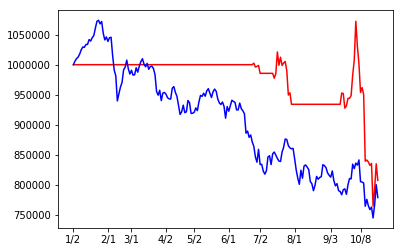

In [20]:
plt.figure()
line1 = plt.plot(dates,df_asset_values["my_model"],'r')
line2 = plt.plot(dates,df_asset_values["hs300"],'b')
ticks = [dates[dates>="2018-{:02d}-01".format(i)].min() for i in
              range(1,12) if (dates>="2018-{:02d}-01".format(i)).any()]
import datetime
labels = [datetime.datetime.strptime(t,"%Y-%m-%d").strftime("%#m/%#d") for t
          in 
          ticks]
plt.xticks(ticks,labels)